# Airbnb listing NYC

The Purpose of this file is to analyse data and prices for Airbnb Listing below:
- http://data.insideairbnb.com/united-states/ny/new-york-city/2023-09-05/visualisations/listings.csv

## First Load The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("listings.csv")
df

## Initial Analysis

In [4]:
# Set display options to show all rows and columns without truncation
pd.set_option('display.max_rows', 75)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Adjust display width if needed

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,3.945300e+04,3.945300e+04,39453.000000,39453.000000,39453.000000,39453.000000,39453.000000,29212.000000,39453.000000,39453.000000,39453.000000,0.0
mean,2.777827e+17,1.558358e+08,40.728900,-73.945051,219.153651,28.054394,25.842724,1.137758,37.445695,144.782146,7.359567,NaN
std,3.799188e+17,1.668028e+08,0.057274,0.056121,506.233396,26.705495,56.744950,1.711142,111.920453,140.252537,16.342439,NaN
min,2.595000e+03,2.234000e+03,40.500314,-74.251907,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.985761e+07,1.654242e+07,40.688310,-73.982680,80.000000,30.000000,0.000000,0.120000,1.000000,0.000000,0.000000,NaN
50%,4.542787e+07,7.772600e+07,40.725630,-73.953680,135.000000,30.000000,5.000000,0.450000,1.000000,107.000000,0.000000,NaN
75%,7.135249e+17,2.768313e+08,40.762580,-73.925347,225.000000,30.000000,24.000000,1.620000,5.000000,291.000000,6.000000,NaN
max,9.733282e+17,5.355317e+08,40.911380,-73.713650,30000.000000,1250.000000,1834.000000,79.820000,597.000000,365.000000,686.000000,NaN


In [6]:
pd.DataFrame(df.isna().sum())

,0
id,0
name,0
host_id,0
host_name,5
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


## Cleaning

In [7]:
# Set display options to show all rows and columns 
pd.set_option('display.max_rows', 75)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Adjust display width if needed

drop columns with irrelative data along with id

In [8]:
df = df.drop(['last_review','license','id'], axis = 1)

Fill NA Values at 'reviews_per_month' with 0

In [106]:
df.fillna({'reviews_per_month':0}, inplace=True)

Remove small null values

In [107]:
df = df.dropna()

In [108]:
df.head(8)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,0.29,3,365,0
1,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,66,30,50,0.29,2,177,0
2,Rental unit in Brooklyn · ★4.75 · 2 bedrooms ·...,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,235,30,4,0.03,1,65,1
3,Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81,30,191,1.10,1,239,6
4,Condo in New York · 1 bedroom · 1 bed · 1 shar...,16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65,30,1,0.07,2,365,0
5,Rental unit in New York · ★4.88 · 1 bedroom · ...,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,72,30,246,1.46,1,278,7
6,Loft in Brooklyn · ★4.91 · 1 bedroom · 1 bed ·...,17297,Joelle,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,95,30,13,0.08,2,26,2
7,Home in Brooklyn · ★4.88 · 1 bedroom · 2 beds ...,17571,Jane,Brooklyn,Fort Greene,40.69194,-73.97389,Private room,205,2,344,2.07,2,283,42


In [109]:
# Exclude property with listed price of 0
df = df.loc[df['price'] > 0]


Overall View of Columns Histogram

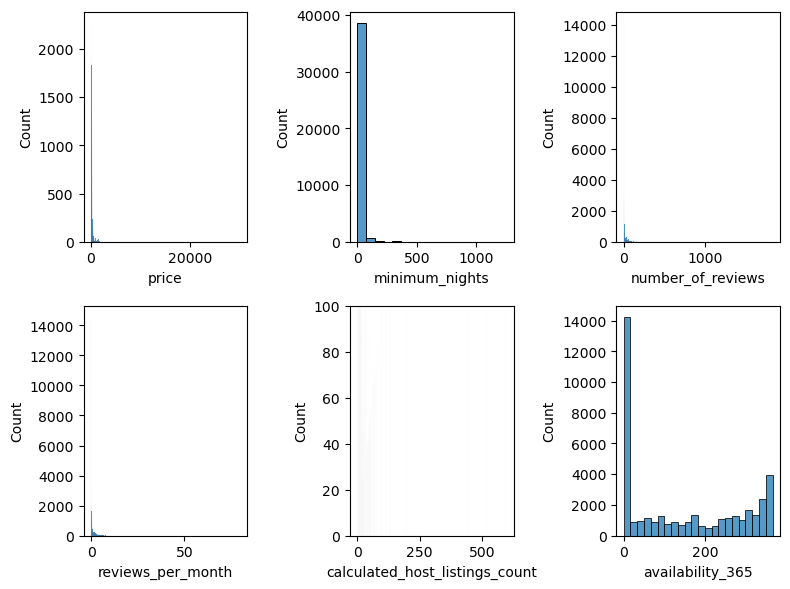

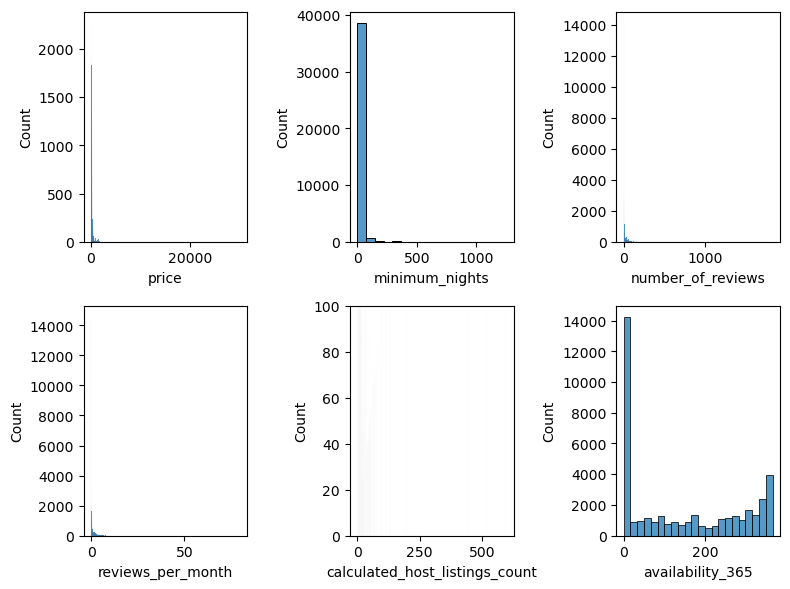

In [111]:
f, ax = plt.subplots(2,3 ,figsize=(8, 6))

sns.histplot(df['price'], ax= ax[0,0])

sns.histplot(df['minimum_nights'], ax= ax[0,1])

sns.histplot(df['number_of_reviews'], ax= ax[0,2])

sns.histplot(df['reviews_per_month'], ax= ax[1,0])

sns.histplot(df['calculated_host_listings_count'], ax= ax[1,1])
ax[1,1].set_ylim(0, 100)

sns.histplot(df['availability_365'], ax= ax[1,2])

plt.tight_layout() # avoid overlap of plots
plt.show()

## Initial Visualization

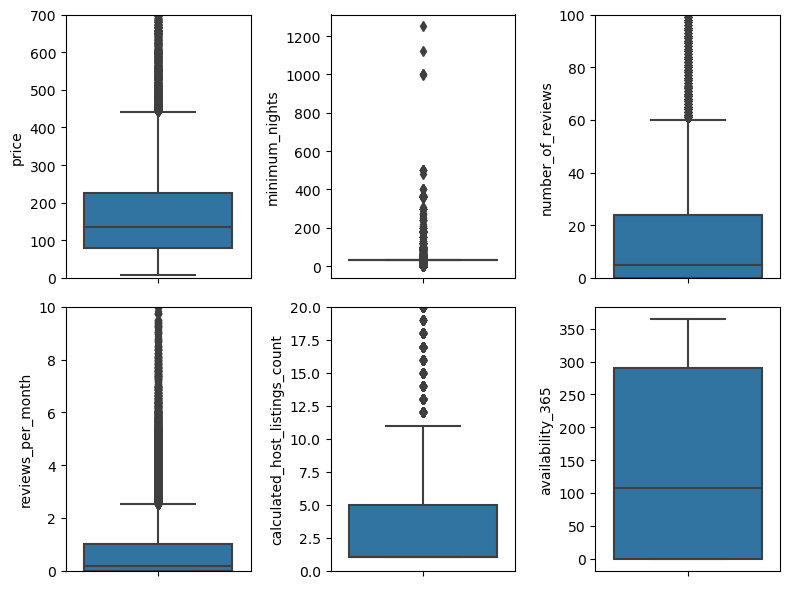

In [120]:
f, ax = plt.subplots(2,3,figsize=(8, 6))

sns.boxplot(y = df['price'], ax = ax [0,0]) 
ax[0,0].set_ylim(0,700)

sns.boxplot(y = df['minimum_nights'], ax= ax[0,1])

sns.boxplot(y = df['number_of_reviews'], ax= ax[0,2])
ax[0,2].set_ylim(0,100
                )
sns.boxplot(y = df['reviews_per_month'], ax= ax[1,0])
ax[1,0].set_ylim(0,10)

sns.boxplot(y = df['calculated_host_listings_count'], ax= ax[1,1])
ax[1,1].set_ylim(0,20)

sns.boxplot(y = df['availability_365'], ax= ax[1,2])

plt.tight_layout() # avoid overlap of plots
plt.show()

Above Data gives us insight of data distribution on all columns

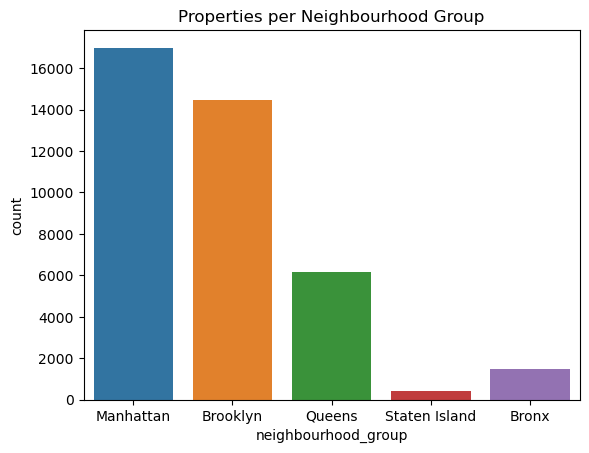

In [19]:
title = 'Properties per Neighbourhood Group'
sns.countplot(x = 'neighbourhood_group', data = df)
plt.title(title)
plt.show()

Most properties are located in Brooklyn and Manhattan.

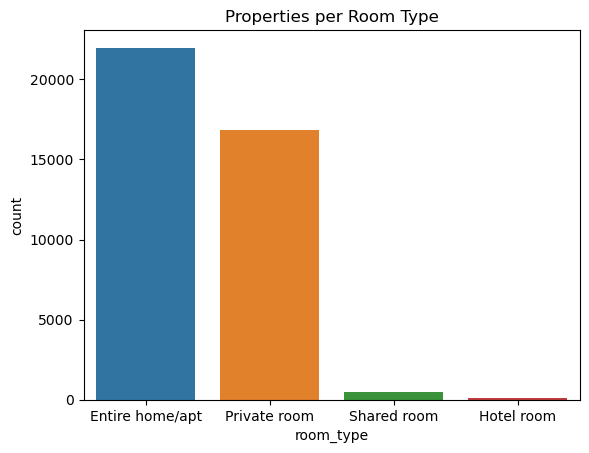

In [23]:
title = 'Properties per Room Type'
sns.countplot(x = 'room_type', data = df)
plt.title(title)
plt.ioff()

Most properties are Entire home or Private room.

## Relate number of bathrooms to hosts & Price

## Relation Visualization
- Examine relation between location and price
- Examine relation between room type and price

C:\Users\amrta\AppData\Local\Temp\ipykernel_6948\1489512842.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), square=True, annot=True, cmap="Blues")


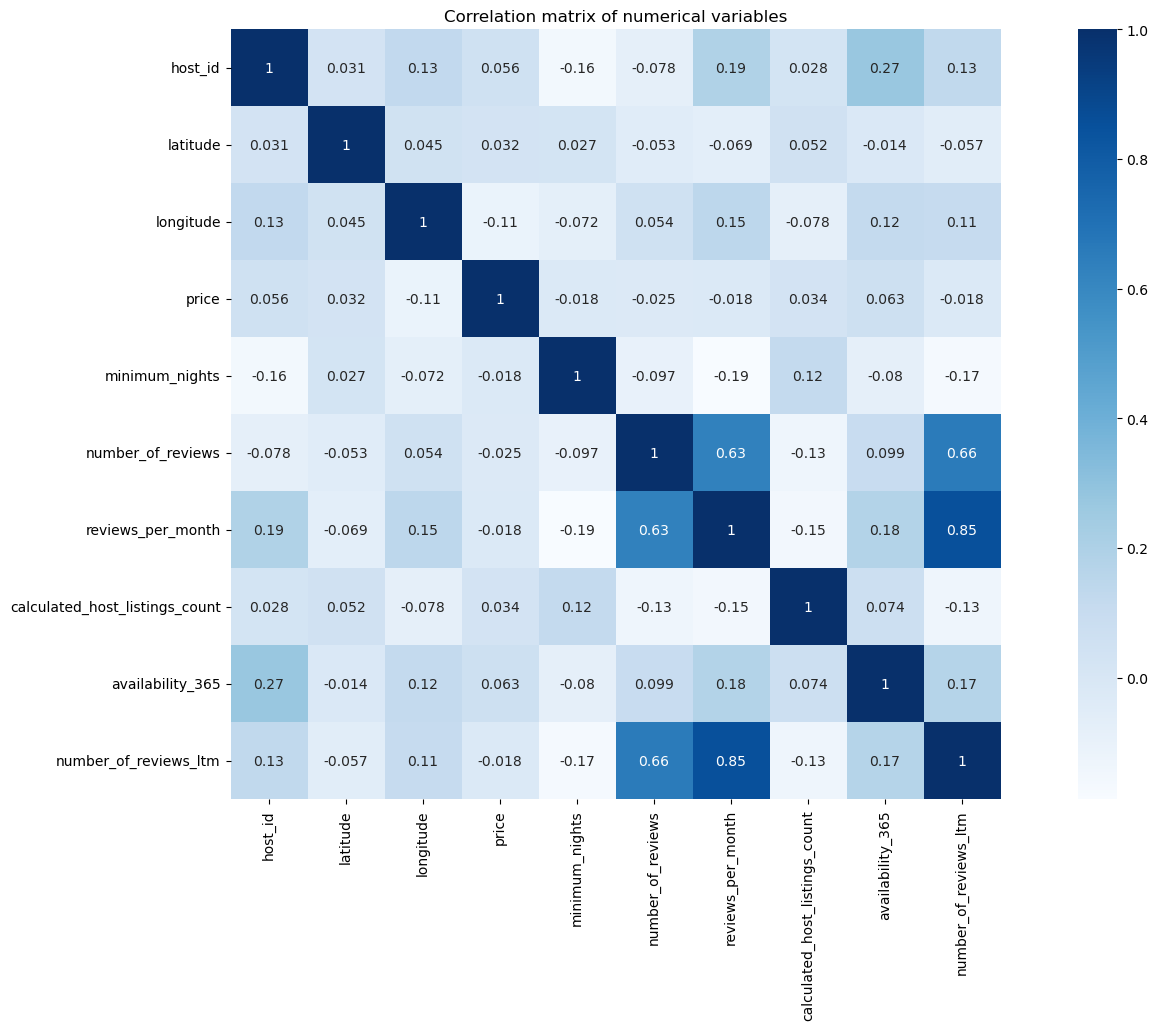

In [29]:
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(df.corr(), square=True, annot=True, cmap="Blues")
plt.title(title)
plt.show()

What we can see from data is most columns actually usefull (not much repeated-correlated data)

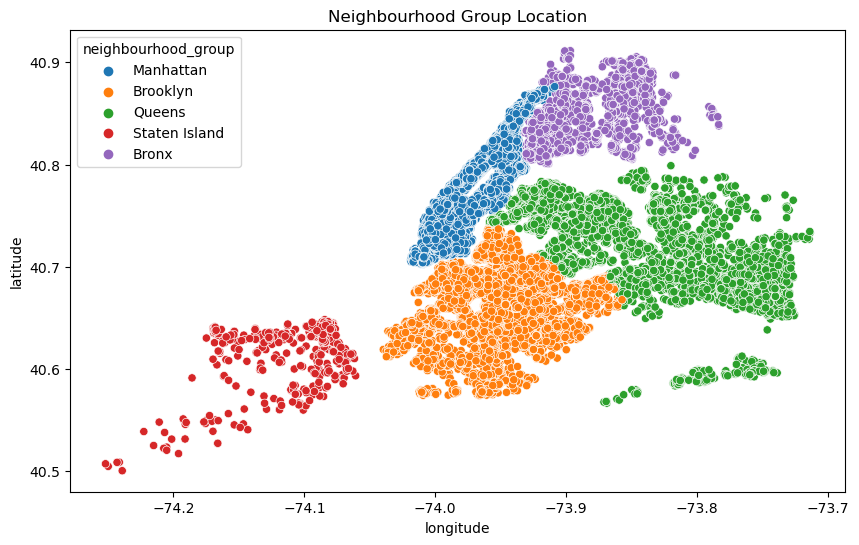

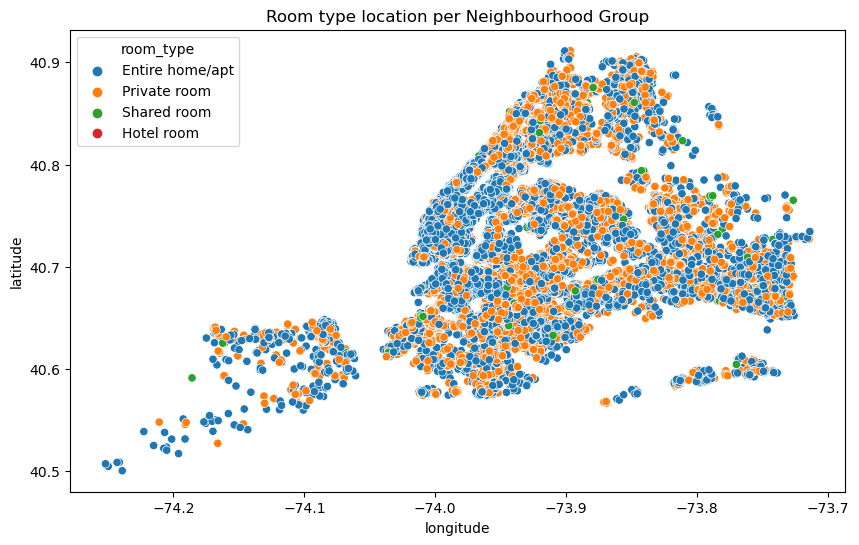

In [41]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(x ="longitude",y = "latitude",data = df,hue="neighbourhood_group").set_title(title)
plt.show()

title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(x ="longitude",y = "latitude",data = df,hue="room_type").set_title(title)
plt.show()

In [42]:
df[['price']].describe()

,price
count,39447.000000
mean,219.175451
std,506.268078
min,8.000000
25%,80.000000
50%,135.000000
75%,225.000000
max,30000.000000


the above data shows price distribution

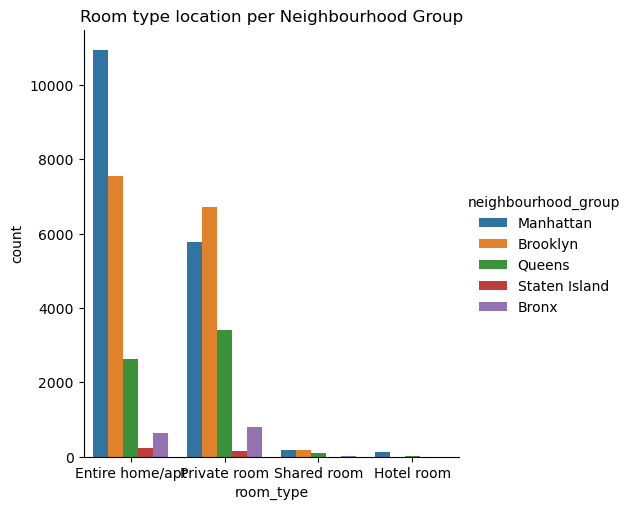

In [47]:
title = 'Room type location per Neighbourhood Group'
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=df);
plt.title(title)
plt.show()

- A majority of Entire home/apt are located in Manhattan
- A majority of private rooms are located in Brooklyn

## Price relation to Neighbourhood Group


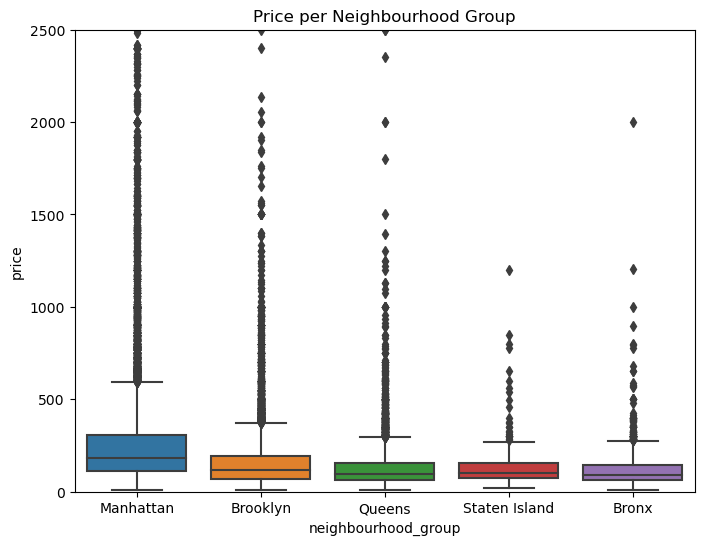

In [55]:
x= 'neighbourhood_group'
y= 'price'
title = 'Price per Neighbourhood Group'

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=df)
plt.title(title)
plt.ylim(0,2500)
plt.show()

As we can See Manhatten has highest prices followed by brooklyn

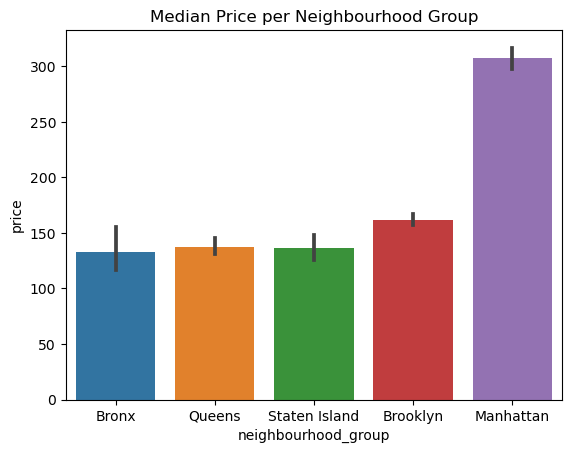

In [57]:
title = 'Median Price per Neighbourhood Group'
result = df.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=df, order=result['neighbourhood_group'])
plt.title(title)
plt.show()

While manhattens median price goes up to 300. Other areas have median of aroung 125-150

## Price Relation to room Type

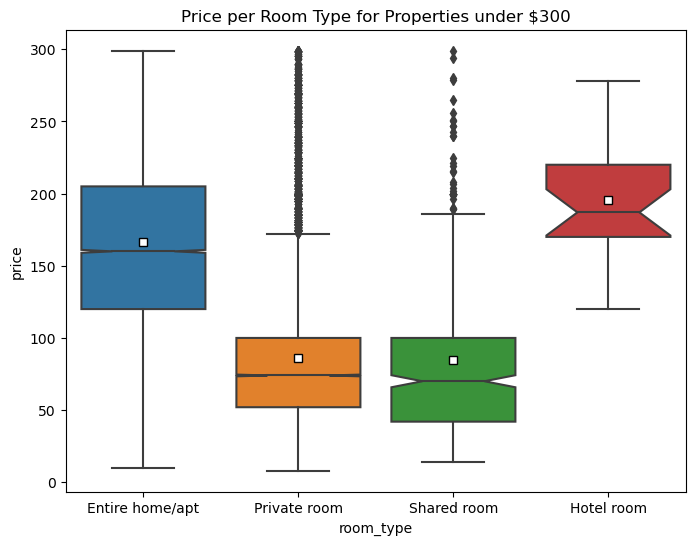

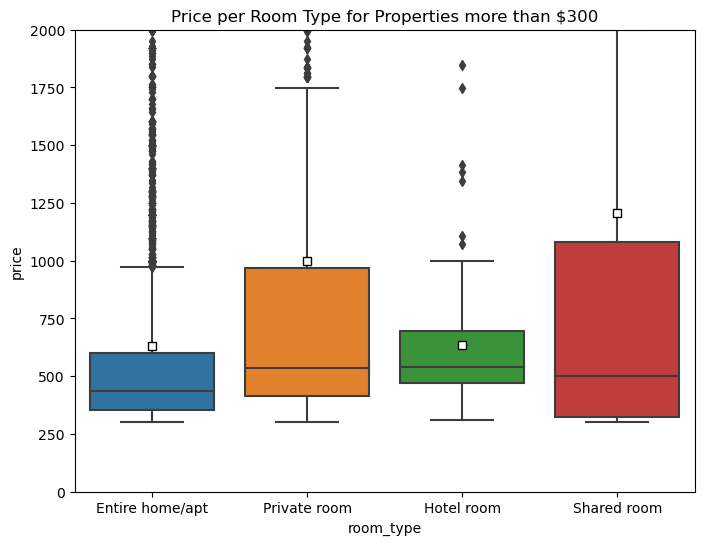

In [63]:
title = 'Price per Room Type for Properties under $300'
data_filtered = df.loc[df['price'] < 300]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered
, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.show()

title = 'Price per Room Type for Properties more than $300'
data_filtered = df.loc[df['price'] > 300]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered
, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ylim(0,2000)
plt.show()

- Entire Homes and Hotel Rooms are the most expensive while under 300
- while, Shared, Private rooms Becoming more expensive above 300

## More Data Insights

**Average room rent for locality**.

So looking at the  plot it is clear :

a. Shared/Private room at staten Island is the most cheapest stay per night whereas Renting a Entire apartment/Home at Manhattan per night is the most expensive.

b. Average price for Private room is also considerably expensive at manhattan so is the shared room at Manhattan is expensive than other private rooms of the neighbourhood. This clearly states that Manhattan is the expensive stay than any other locality.

c. Bronx/Staten Island are the most cheapest stay in terms of neighbourhood group comparison in respect to room type.


We will also list out the average price for each type of room per neighbourhood so that user can plan based on the budget.

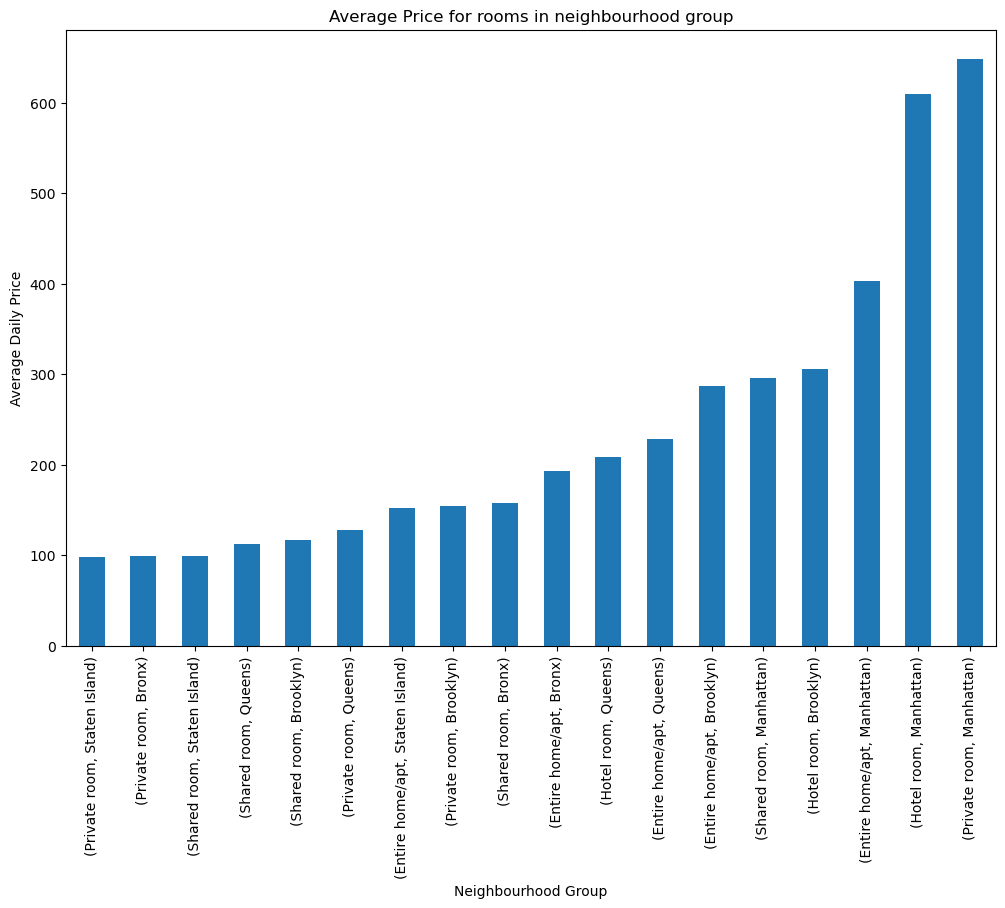

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Manhattan            402.830827
                Brooklyn             287.460000
                Queens               228.412162
                Staten Island        151.696970
                Bronx                192.616438
Hotel room      Brooklyn             305.500000
                Queens               208.285714
                Manhattan            609.560440
Private room    Staten Island         98.093750
                Manhattan            648.321429
                Queens               127.956432
                Bronx                 98.927835
                Brooklyn             154.336933
Shared room     Brooklyn             116.461538
                Queens               112.240000
                Manhattan            295.363636
                Staten Island         99.000000
                Bronx                157.500000

In [121]:
df.head()
plt.figure(figsize=(12,8))
df0 = df[df['minimum_nights']==1]
df1 = df0.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

### Expensive Neighbourhood

So we will now plot the most expensive neighbourhood, and we will plot only Top 15 neighbourhood and Bottom 15 with respect to average price. This will help a traveller to choose the appropriate neighbourhood based on his budget.

So according to the below plot Fort Wadsworth is the most expensive in terms of neighbourhood. Whereas Bull's head locality is the least expensive to stay.

Top 15 most expensive locality in Airbnb listing are :


C:\Users\amrta\AppData\Local\Temp\ipykernel_6948\2988265580.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",


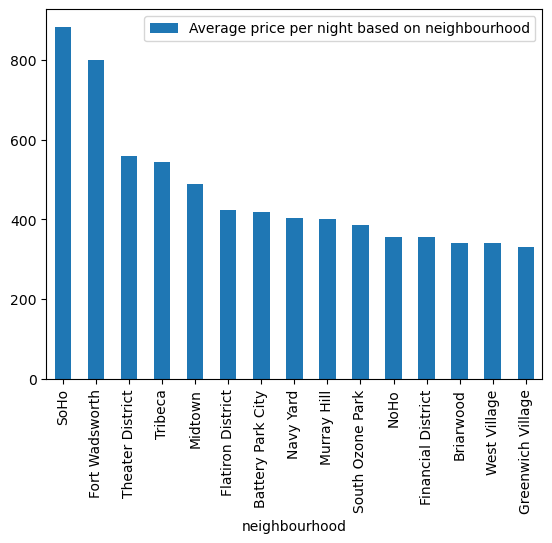

,Average price per night based on neighbourhood
neighbourhood,
SoHo,883.602410
Fort Wadsworth,800.000000
Theater District,558.502451
Tribeca,545.323671
Midtown,488.508754
Flatiron District,423.906977
Battery Park City,418.876404
Navy Yard,404.666667
Murray Hill,400.476082


In [129]:
print('Top 15 most expensive locality in Airbnb listing are :')
df4 = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)

Top 15 most cheap locality in Airbnb listing are :


C:\Users\amrta\AppData\Local\Temp\ipykernel_6948\3581986224.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4 = df.groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",


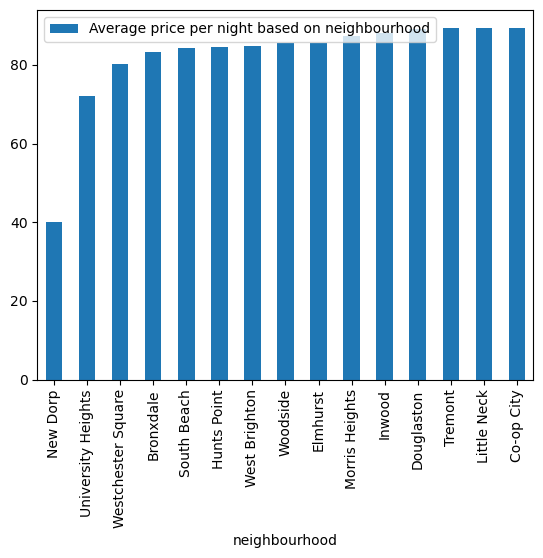

,Average price per night based on neighbourhood
neighbourhood,
New Dorp,40.000000
University Heights,72.142857
Westchester Square,80.125000
Bronxdale,83.200000
South Beach,84.200000
Hunts Point,84.500000
West Brighton,84.782609
Woodside,85.631169
Elmhurst,85.679641


In [128]:
print('Top 15 most cheap locality in Airbnb listing are :')
df4 = df.groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=True).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

df4.plot(kind='bar')
plt.show()
pd.DataFrame(df4)

**Most number of locality listed**

We will now try to figure out how many number of neighbourhood has been posted based on the count. 

I have listed below the listing of top 15 as well as least 15 based on the neighbourhood.

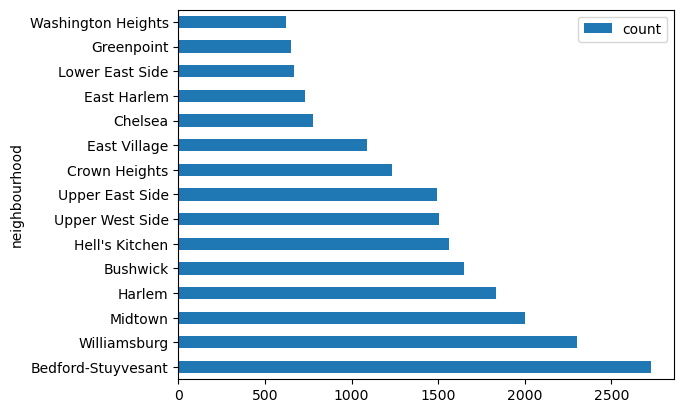

,count
neighbourhood,
Bedford-Stuyvesant,2727
Williamsburg,2303
Midtown,1999
Harlem,1837
Bushwick,1647
Hell's Kitchen,1562
Upper West Side,1504
Upper East Side,1494
Crown Heights,1231


In [84]:
df5 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.head(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.head(15))

Least Listing number of count


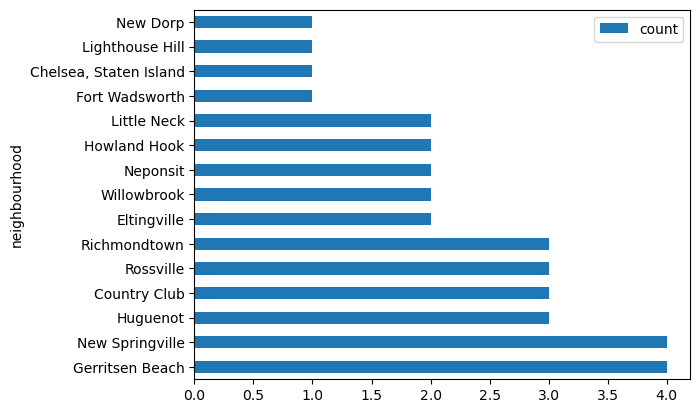

,count
neighbourhood,
Gerritsen Beach,4
New Springville,4
Huguenot,3
Country Club,3
Rossville,3
Richmondtown,3
Eltingville,2
Willowbrook,2
Neponsit,2


In [130]:
print('Least Listing number of count')
df5 = df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.tail(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.tail(15))

**Location and Review Score**

Review is the one of the important criteria with online activity these days. This gives a lot of insights to a particular place for user and they can swing mood when it comes to online booking. A cheap place with bad review can drive a tourist for not booking and an expensive place with nicest review can shell a tourist more than what he have thought initially. So we will try to figure out the review , how each neighbourhood is doing in respect to review. Since there is a limited data with review we will try to figure out as much as we can.

First criteria of our review is we will consider only those who have a review more than 50, so that we can have an insight of the data.

So according to the below plot, Brooklyn got most review in comparison to Manhattan and that is an interesting find. Also Staten Island which is cheaper has less review than the other neighbourhood group. We cannot proceed further to understand why is that case since we have a limited data.

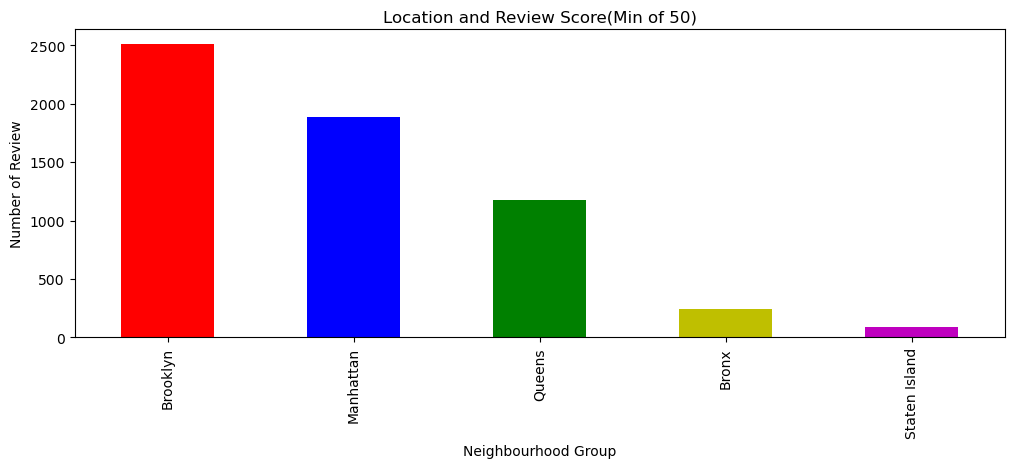

 Count of Review v/s neighbourhood group


,neighbourhood_group
Brooklyn,2509
Manhattan,1888
Queens,1179
Bronx,245
Staten Island,89


In [131]:
fig = plt.figure(figsize=(12,4))
review_50 = df[df['number_of_reviews']>=50]
df2 = review_50['neighbourhood_group'].value_counts()
df2.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood Group')
plt.show()
print(' Count of Review v/s neighbourhood group')
pd.DataFrame(df2)

**Top 5 host**

Based on the review score(Minimum 50) we will plot, who is our top 5 Host, this increases the confidence of tourist before booking.


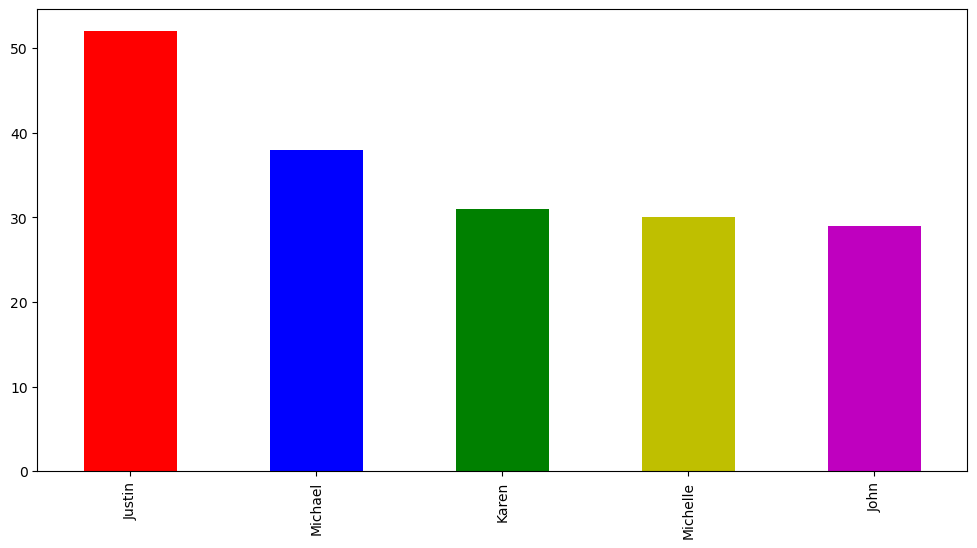

In [133]:
plt.figure(figsize=(12,6))
review_50.head(2)
df1 = review_50['host_name'].value_counts()[:5].plot(kind='bar',color=['r','b','g','y','m'])
#sns.barplot(x=df1.index,y=df1.values)
plt.show()

As Shown user can foind here most trustworthy hosts

**Plot Price based on the Availability 365**

We will plot a scatterplot to understand if there is any price increase based on the availability and looking below the plot its hardly to infer. But looks like with availability with 365 the price increases.

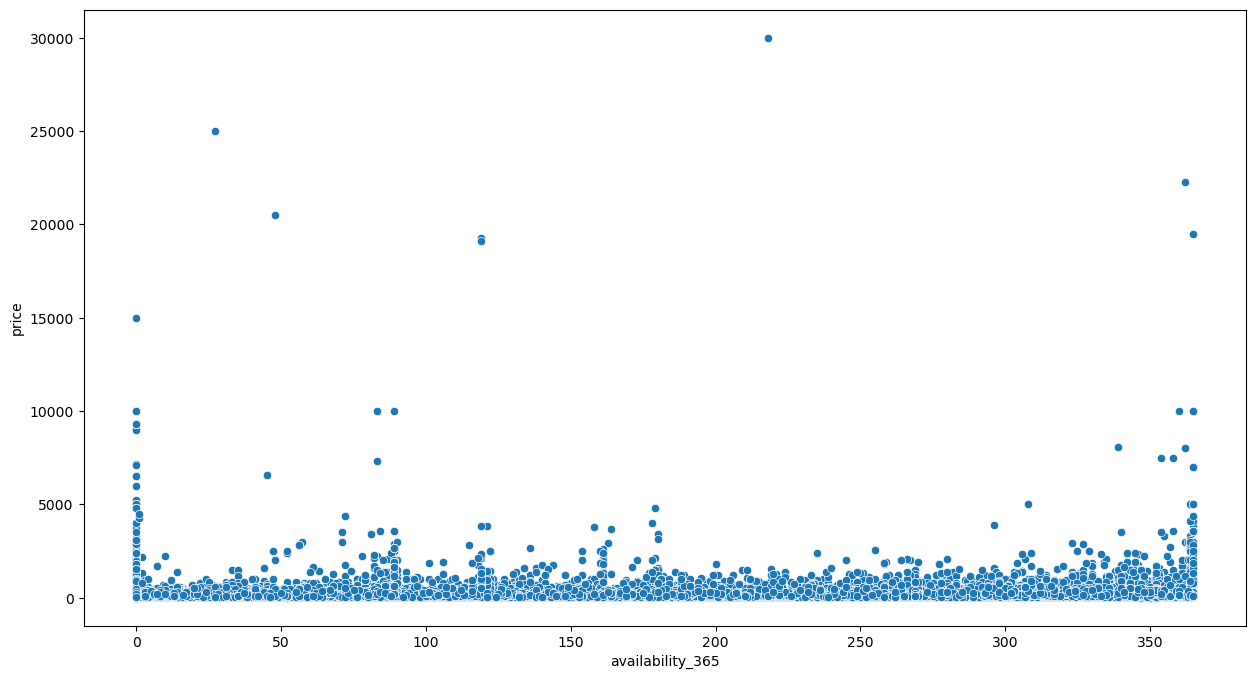

In [134]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=df['price'],x=df['availability_365'])
plt.show()

## Conclusion

- The properties have large differences in prices.
- Separating the dataset by price categories is useful for the analysis.
- The most interesting variables regarding price prediction are:
    - Location
    - Room type
- based on data above user can estimate and judge where to select and type of room to select based on his/her budget.